## 자동차 리콜 3개년 분석

## 데이터 출처
-  https://www.data.go.kr/data/3048950/fileData.do

[받은 파일]
- 2020년:자동차리콜현황(2020) v3.0.csv
- 2021년:자동차리콜현황(2021).csv
- 2022년:한국교통안전공단_자동차결함 리콜현황_20221231.csv

In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
#데이터 로드
df1 = pd.read_csv('./data/자동차리콜현황(2021).csv',encoding='euc_kr')
df2 = pd.read_csv('./data/자동차리콜현황(2020) v3.0.csv', encoding='euc_kr')
df3 = pd.read_csv('./data/한국교통안전공단_자동차결함 리콜현황_20221231.csv',encoding='euc_kr')


In [80]:
# 데이터 병합
df = pd.concat([df1, df2, df3])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4656 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       4656 non-null   object
 1   차명        4656 non-null   object
 2   생산기간(부터)  4656 non-null   object
 3   생산기간(까지)  4656 non-null   object
 4   리콜개시일     4656 non-null   object
 5   리콜사유      4656 non-null   object
dtypes: object(6)
memory usage: 254.6+ KB


In [81]:
df.isnull().sum()

제작자         0
차명          0
생산기간(부터)    0
생산기간(까지)    0
리콜개시일       0
리콜사유        0
dtype: int64

In [82]:
# 데이터 중복 처리(삭제)
df[df.duplicated(keep=False)]
#print(len(df))   4619
df = df.drop_duplicates()
#print(len(df))   4603

In [64]:
df.head(5)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,(주) 바이크코리아,Rocket 3 R,2020-02-14,2020-08-31,2021-01-02,"뒷브레이크 에 제동 액을 주입하여 브레이크 압력을 설정하는 제작 공정이 불량하여 ,..."
1,(주) 바이크코리아,Rocket 3 GT,2020-02-13,2020-08-29,2021-01-02,"뒷브레이크 에 제동 액을 주입하여 브레이크 압력을 설정하는 제작 공정이 불량하여 ,..."
2,스텔란티스코리아주식회사,짚그랜드체로키,2010-07-20,2013-01-10,2021-01-04,2014년 및 2015년도에 시행되었던 리콜P54(2014RIV156)와 R09(2...
3,혼다코리아(주),CRF1100,2020-04-10,2020-10-20,2021-01-07,탱크 제조시 용접 과정에서 발생한 산화 아연이 연료 펌프의 흡입 필터에 흡착된다.
4,혼다코리아(주),CRF1000,2018-03-15,2019-06-10,2021-01-07,탱크 제조시 용접 과정에서 발생한 산화 아연이 연료 펌프의 흡입 필터에 흡착된다.


In [83]:
df['생산기간(부터)'] = pd.to_datetime(df['생산기간(부터)'])
df['생산_년']=df['생산기간(부터)'].dt.year
df['생산_월']=df['생산기간(부터)'].dt.month
df['생산_일']=df['생산기간(부터)'].dt.day

df['생산기간(까지)'] = pd.to_datetime(df['생산기간(까지)'])
df['종료_년']=df['생산기간(까지)'].dt.year
df['종료_월']=df['생산기간(까지)'].dt.month
df['종료_일']=df['생산기간(까지)'].dt.day

df['리콜개시일'] = pd.to_datetime(df['리콜개시일'])
df['리콜_년']=df['리콜개시일'].dt.year
df['리콜_월']=df['리콜개시일'].dt.month
df['리콜_일']=df['리콜개시일'].dt.day

In [84]:
df.head(5)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,생산_년,생산_월,생산_일,종료_년,종료_월,종료_일,리콜_년,리콜_월,리콜_일
0,(주) 바이크코리아,Rocket 3 R,2020-02-14,2020-08-31,2021-01-02,"뒷브레이크 에 제동 액을 주입하여 브레이크 압력을 설정하는 제작 공정이 불량하여 ,...",2020,2,14,2020,8,31,2021,1,2
1,(주) 바이크코리아,Rocket 3 GT,2020-02-13,2020-08-29,2021-01-02,"뒷브레이크 에 제동 액을 주입하여 브레이크 압력을 설정하는 제작 공정이 불량하여 ,...",2020,2,13,2020,8,29,2021,1,2
2,스텔란티스코리아주식회사,짚그랜드체로키,2010-07-20,2013-01-10,2021-01-04,2014년 및 2015년도에 시행되었던 리콜P54(2014RIV156)와 R09(2...,2010,7,20,2013,1,10,2021,1,4
3,혼다코리아(주),CRF1100,2020-04-10,2020-10-20,2021-01-07,탱크 제조시 용접 과정에서 발생한 산화 아연이 연료 펌프의 흡입 필터에 흡착된다.,2020,4,10,2020,10,20,2021,1,7
4,혼다코리아(주),CRF1000,2018-03-15,2019-06-10,2021-01-07,탱크 제조시 용접 과정에서 발생한 산화 아연이 연료 펌프의 흡입 필터에 흡착된다.,2018,3,15,2019,6,10,2021,1,7


## 1. 제조사별 리콜 현황
* 3년동안 리콜 건수가 가장 많은 제조사는?
* 시각화를 통해 근거 자료 만들기

In [85]:
df.head(2)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,생산_년,생산_월,생산_일,종료_년,종료_월,종료_일,리콜_년,리콜_월,리콜_일
0,(주) 바이크코리아,Rocket 3 R,2020-02-14,2020-08-31,2021-01-02,"뒷브레이크 에 제동 액을 주입하여 브레이크 압력을 설정하는 제작 공정이 불량하여 ,...",2020,2,14,2020,8,31,2021,1,2
1,(주) 바이크코리아,Rocket 3 GT,2020-02-13,2020-08-29,2021-01-02,"뒷브레이크 에 제동 액을 주입하여 브레이크 압력을 설정하는 제작 공정이 불량하여 ,...",2020,2,13,2020,8,29,2021,1,2


In [86]:
recall_df = df.groupby(by = '제작자').size().sort_values(ascending=False).to_frame('리콜건수')

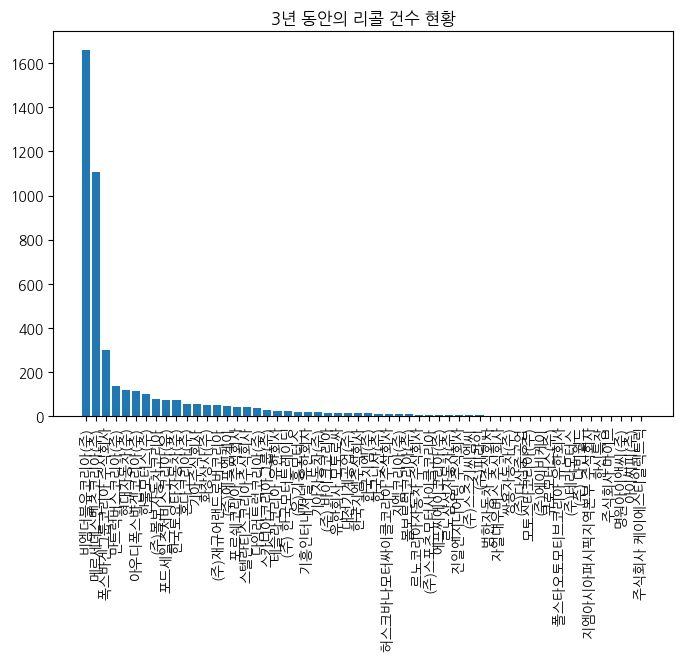

In [87]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family ='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 현상 해결

x = recall_df.index
y = recall_df['리콜건수'].values

plt.figure(figsize = (8,5))
plt.bar(x = x, height=y)
plt.xticks(rotation = 90)
plt.title('3년 동안의 리콜 건수 현황')
plt.show()

```
문제: 3년동안 리콜건수가 가장 많은 제조사는?
답: 비엠더블유 코리아

```

## 2.(그나마) 튼튼하게 만드는 기업 vs  Worst 기업 top10

* 출고 년도부터 리콜 개시일 사이의 기간을 사용기간이라고 할때, 
* 이 사용기간이 길면 길수록 그나마 튼튼하게 만들었다고 볼 수 있다. 
* 물론, 여기 리콜현황에 등록되지 않은 제조사가 베스트이겠지만....
* 사용기간의 평균이 가장 높고 낮은 10개 기업 리스트를 알아보자

In [88]:
df.head(5)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,생산_년,생산_월,생산_일,종료_년,종료_월,종료_일,리콜_년,리콜_월,리콜_일
0,(주) 바이크코리아,Rocket 3 R,2020-02-14,2020-08-31,2021-01-02,"뒷브레이크 에 제동 액을 주입하여 브레이크 압력을 설정하는 제작 공정이 불량하여 ,...",2020,2,14,2020,8,31,2021,1,2
1,(주) 바이크코리아,Rocket 3 GT,2020-02-13,2020-08-29,2021-01-02,"뒷브레이크 에 제동 액을 주입하여 브레이크 압력을 설정하는 제작 공정이 불량하여 ,...",2020,2,13,2020,8,29,2021,1,2
2,스텔란티스코리아주식회사,짚그랜드체로키,2010-07-20,2013-01-10,2021-01-04,2014년 및 2015년도에 시행되었던 리콜P54(2014RIV156)와 R09(2...,2010,7,20,2013,1,10,2021,1,4
3,혼다코리아(주),CRF1100,2020-04-10,2020-10-20,2021-01-07,탱크 제조시 용접 과정에서 발생한 산화 아연이 연료 펌프의 흡입 필터에 흡착된다.,2020,4,10,2020,10,20,2021,1,7
4,혼다코리아(주),CRF1000,2018-03-15,2019-06-10,2021-01-07,탱크 제조시 용접 과정에서 발생한 산화 아연이 연료 펌프의 흡입 필터에 흡착된다.,2018,3,15,2019,6,10,2021,1,7


In [94]:
# 사용기간 컬럼 새로 만들기(파생변수 생성해서)
df['사용기간'] = df['리콜개시일'] - df['생산기간(까지)']
df.head(3)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,생산_년,생산_월,생산_일,종료_년,종료_월,종료_일,리콜_년,리콜_월,리콜_일,사용기간
0,(주) 바이크코리아,Rocket 3 R,2020-02-14,2020-08-31,2021-01-02,"뒷브레이크 에 제동 액을 주입하여 브레이크 압력을 설정하는 제작 공정이 불량하여 ,...",2020,2,14,2020,8,31,2021,1,2,124 days
1,(주) 바이크코리아,Rocket 3 GT,2020-02-13,2020-08-29,2021-01-02,"뒷브레이크 에 제동 액을 주입하여 브레이크 압력을 설정하는 제작 공정이 불량하여 ,...",2020,2,13,2020,8,29,2021,1,2,126 days
2,스텔란티스코리아주식회사,짚그랜드체로키,2010-07-20,2013-01-10,2021-01-04,2014년 및 2015년도에 시행되었던 리콜P54(2014RIV156)와 R09(2...,2010,7,20,2013,1,10,2021,1,4,2916 days


In [110]:
# 제조사별 사용기간이 가장 긴 순서대로 정렬
avg_use_df = df.groupby('제작자')['사용기간'].mean().sort_values(ascending=False).to_frame('평균 사용 기간')

In [112]:
avg_use_df['평균 사용 기간'] = avg_use_df['평균 사용 기간'].dt.days

In [115]:
good_df = avg_use_df.head(10)

In [116]:
worst_df = avg_use_df.tail(10)

<Figure size 800x400 with 0 Axes>

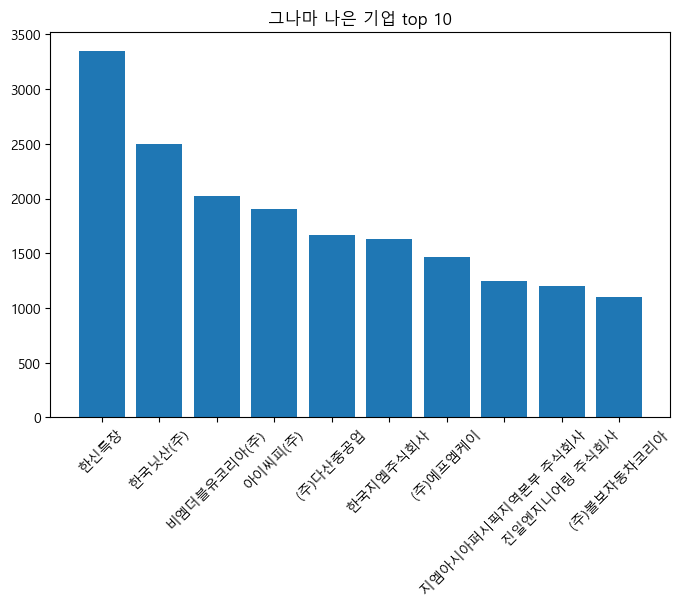

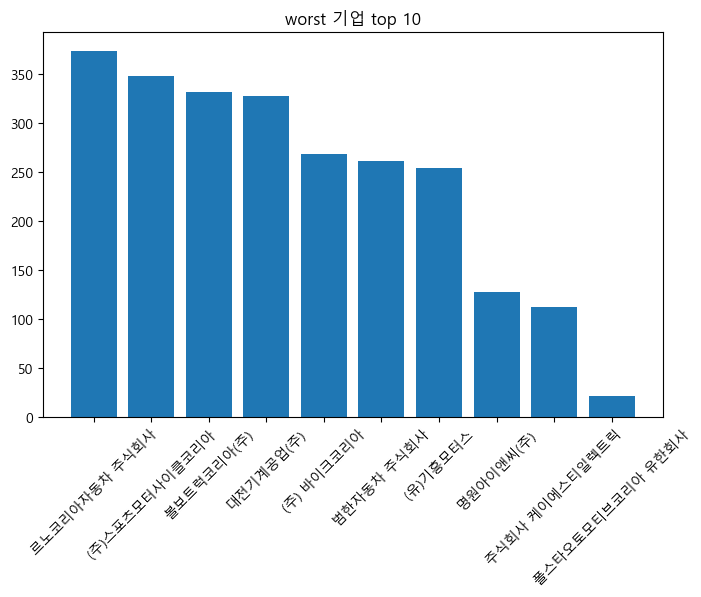

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

# 그나마 좋은 기업 그래프
x = good_df.index
y = good_df['평균 사용 기간'].values

plt.figure(figsize = (8,5))
plt.bar(x = x, height=y)
plt.xticks(rotation = 45)
plt.title('그나마 나은 기업 top 10')

# worst 기업 그래프

x = worst_df.index
y = worst_df['평균 사용 기간'].values

plt.figure(figsize = (8,5))
plt.bar(x = x, height=y)
plt.xticks(rotation = 45)
plt.title('worst 기업 top 10')
plt.show()

```
문제:그나마 튼튼 제조사 top 3는?
답: 한신득장, 한신닛산, 비엠더블유 코리아
```

## 3. 리콜이 가장 많은 제조사 1위의 리콜 원인은 ?
* 리콜 대마왕 XXX 기업의 문제의 모델 xxx에 대해 대규모 손해배상청구 소송을 진행하려 한다. 
* 이 회사의 주요 리콜 사유를 알아내고,(워드 클라우드로 제작해서 키워드 추출)
* 해당 사유로 리콜된 최고 문제 모델을 찾아내서
* 소송으로 가즈아~

In [135]:
# 리콜건수가 가장 많은 제조사는?
#worstest_df = df.groupby(by = '제작자').size().sort_values(ascending=False).to_frame('리콜건수')
worstest_df = df['제작자'].value_counts().index[0]

In [142]:
# 리콜 사유는?
end = df[df['제작자'] == worstest_df]
end.tail(10)


,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,생산_년,생산_월,생산_일,종료_년,종료_월,종료_일,리콜_년,리콜_월,리콜_일,사용기간
1400,비엠더블유코리아(주),K 1600 B,2017-04-24,2018-08-29,2022-12-26,후방 서스펜션 링크의 생산 공정 오류로 내구성이 부족한 부품이 장착되어 시간이 지남...,2017,4,24,2018,8,29,2022,12,26,1580 days
1401,비엠더블유코리아(주),K 1600 GTL,2017-06-06,2018-09-20,2022-12-26,후방 서스펜션 링크의 생산 공정 오류로 내구성이 부족한 부품이 장착되어 시간이 지남...,2017,6,6,2018,9,20,2022,12,26,1558 days
1402,비엠더블유코리아(주),K 1600 GT,2016-10-11,2018-09-17,2022-12-26,후방 서스펜션 링크의 생산 공정 오류로 내구성이 부족한 부품이 장착되어 시간이 지남...,2016,10,11,2018,9,17,2022,12,26,1561 days
1409,비엠더블유코리아(주),BMW iX3 M Sport,2021-05-11,2022-11-02,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,2021,5,11,2022,11,2,2022,12,26,54 days
1410,비엠더블유코리아(주),BMW iX xDrive50,2020-09-01,2022-10-28,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,2020,9,1,2022,10,28,2022,12,26,59 days
1411,비엠더블유코리아(주),BMW iX xDrive40,2021-08-02,2021-11-18,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,2021,8,2,2021,11,18,2022,12,26,403 days
1412,비엠더블유코리아(주),BMW iX M60,2022-03-29,2022-05-16,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,2022,3,29,2022,5,16,2022,12,26,224 days
1413,비엠더블유코리아(주),BMW i7 xDrive60,2022-02-15,2022-09-08,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,2022,2,15,2022,9,8,2022,12,26,109 days
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,2021,11,22,2022,10,24,2022,12,26,63 days
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,2021,11,23,2022,10,24,2022,12,26,63 days


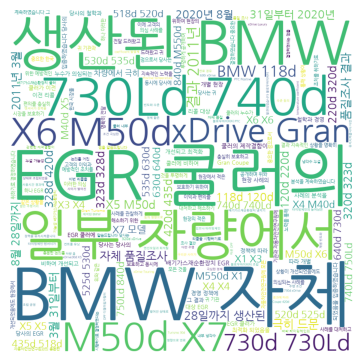

In [143]:
# 워드클라우드를 사용해 키워드 추출

from wordcloud import WordCloud, STOPWORDS
set(STOPWORDS)
spwords = set(['되었습니다','발견','되었습니다.',"수이기는","적은 수이기는","동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당", "있어", "내에",
                "못", '으로", "의한', "위해", '후', '할', '로', '더', '와', '나', '전', '매우', '등', '내에', '을', '함'])

caselist = end['리콜사유'].values
text = ' '.join(caselist)
len(text)


font_path = './NanumGothic.ttf'
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path=font_path,
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(6, 4))
plt.imshow(wc1)
plt.tight_layout()
plt.axis('off')
plt.show()


In [ ]:
# 주요 원인이 포함된 이유 상세 보기


In [ ]:
#주요 원인으로 리콜된 가장 나쁜 모델3개는?


```
리콜 주요 원인은? 

그래서, 가장 나쁜 모델은? 

```